Problem: What are the most important features that influence the success rate of the campaign?

In [ ]:
# !pip install seaborn --upgrade
# !pip install plotly==5.4.0

In [117]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re
import os
from datetime import date

import plotly.express as px
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [118]:
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import collections

import imblearn

In [119]:
# Set default font size
plt.rcParams['font.size'] = 12

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 0.5)

In [130]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = ["level_0", "Unnamed: 0"], axis = 1)
data.head()

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,Ontario_C1_School closing_0.0,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_0.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_0.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_0.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_0.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_0.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_0.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_0.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_0.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81
2,2019-03-03,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671177.75,299434.47,125703.0,5193938.29
3,2019-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265077.82,123662.13,58639.5,1842761.07
4,2019-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [131]:
data.columns

Index(['Date', 'Amount of Employee pricing % off', 'off Particular Item?',
       'Amount of % Off Particular Item', 'Location Specific?',
       'off 1st item?', 'Amount of % off 1st item', 'off conditional?',
       'Amount of $ off conditional', 'Amount of % off conditional',
       ...
       'Saskatchewan_C2_Workplace closing_0.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_0.0',
       'Saskatchewan_C6_Stay at home requirements_1.0', 'WrittenSales',
       'Margin', 'Traffic', 'FinancedAmount'],
      dtype='object', length=111)

In [132]:
data = data.set_index("Date")
data.head()

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,Ontario_C1_School closing_0.0,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_0.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_0.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_0.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_0.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_0.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_0.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_0.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_0.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81
2019-03-03,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671177.75,299434.47,125703.0,5193938.29
2019-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [133]:
print('Number of records :',data.shape[0])
print('Number of features :',data.shape[1])

Number of records : 1020
Number of features : 110


# Exploratory Data Analysis

In [134]:
# data.describe()

In [135]:
data

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,Ontario_C1_School closing_0.0,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_0.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_0.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_0.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_0.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_0.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_0.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_0.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_0.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81
2019-03-03,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671177.75,299434.47,125703.0,5193938.29
2019-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 2019-03-01 to 2021-12-14
Columns: 110 entries, Amount of Employee pricing % off to FinancedAmount
dtypes: float64(34), int64(76)
memory usage: 884.5+ KB


## 1) Null values

In [137]:
pd.DataFrame(data.isnull().sum(), columns=['#Null values']).T

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,Ontario_C1_School closing_0.0,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_0.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_0.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_0.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_0.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_0.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_0.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_0.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_0.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
#Null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/len(data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 110 column(s).
There is/are 0 column(s) that has/have missing values.


,total_missing,perc_missing
Amount of Employee pricing % off,0,0.0
off Particular Item?,0,0.0
Amount of % Off Particular Item,0,0.0
Location Specific?,0,0.0
off 1st item?,0,0.0
...,...,...
Saskatchewan_C6_Stay at home requirements_1.0,0,0.0
WrittenSales,0,0.0
Margin,0,0.0
Traffic,0,0.0


In [139]:
data.columns

Index(['Amount of Employee pricing % off', 'off Particular Item?',
       'Amount of % Off Particular Item', 'Location Specific?',
       'off 1st item?', 'Amount of % off 1st item', 'off conditional?',
       'Amount of $ off conditional', 'Amount of % off conditional',
       'off HomeStore Specials?',
       ...
       'Saskatchewan_C2_Workplace closing_0.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_0.0',
       'Saskatchewan_C6_Stay at home requirements_1.0', 'WrittenSales',
       'Margin', 'Traffic', 'FinancedAmount'],
      dtype='object', length=110)

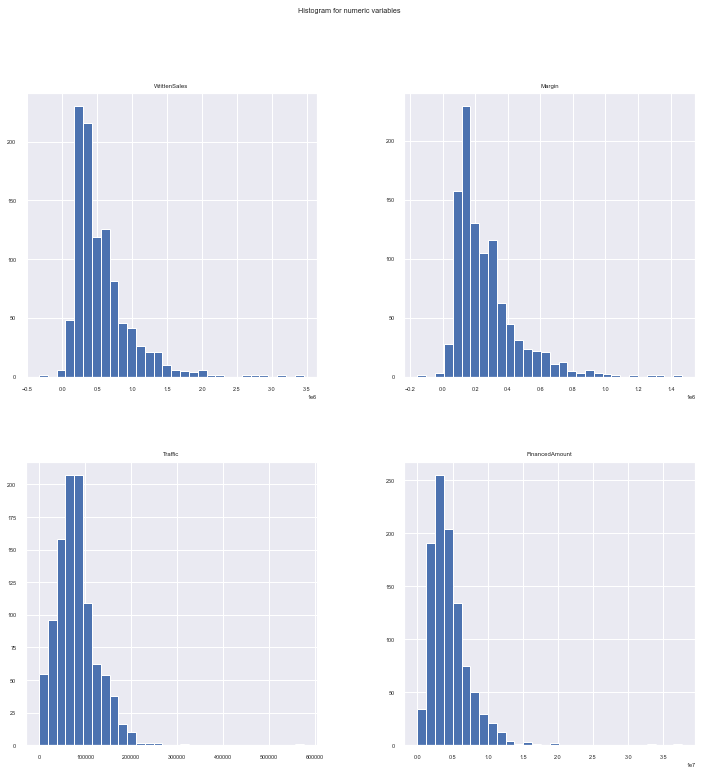

In [140]:
import pylab as pl
data.iloc[:,-4:].hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for numeric variables")
# plt.savefig('...')
plt.show()

# 2- Investigating a Linear Relationship 
Linear regression analysis has five key assumptions. These are:

- We are investigating a linear relationship
- All variables follow a normal distribution
- There is very little or no multicollinearity
- There is little or no autocorrelation
- Data is homoscedastic

In [141]:
import statsmodels.api as sm

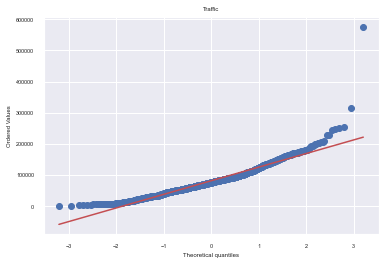

In [142]:
from scipy import stats

stats.probplot(data["Traffic"], dist="norm", plot=plt)
plt.title(f"Traffic")
plt.show()

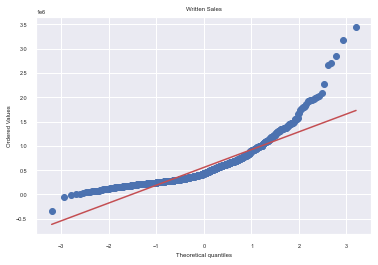

In [143]:
from scipy import stats

stats.probplot(data["WrittenSales"], dist="norm", plot=plt)
plt.title(f"Written Sales")
plt.show()

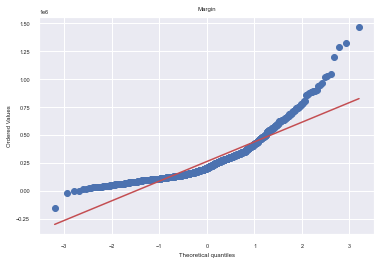

In [144]:
from scipy import stats

stats.probplot(data["Margin"], dist="norm", plot=plt)
plt.title("Margin")
plt.show()

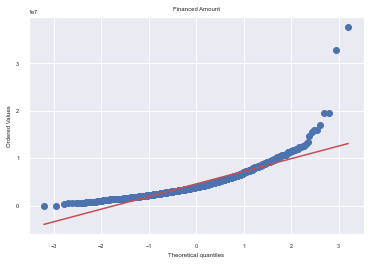

In [145]:
from scipy import stats

stats.probplot(data["FinancedAmount"], dist="norm", plot=plt)
plt.title("Financed Amount")
plt.show()

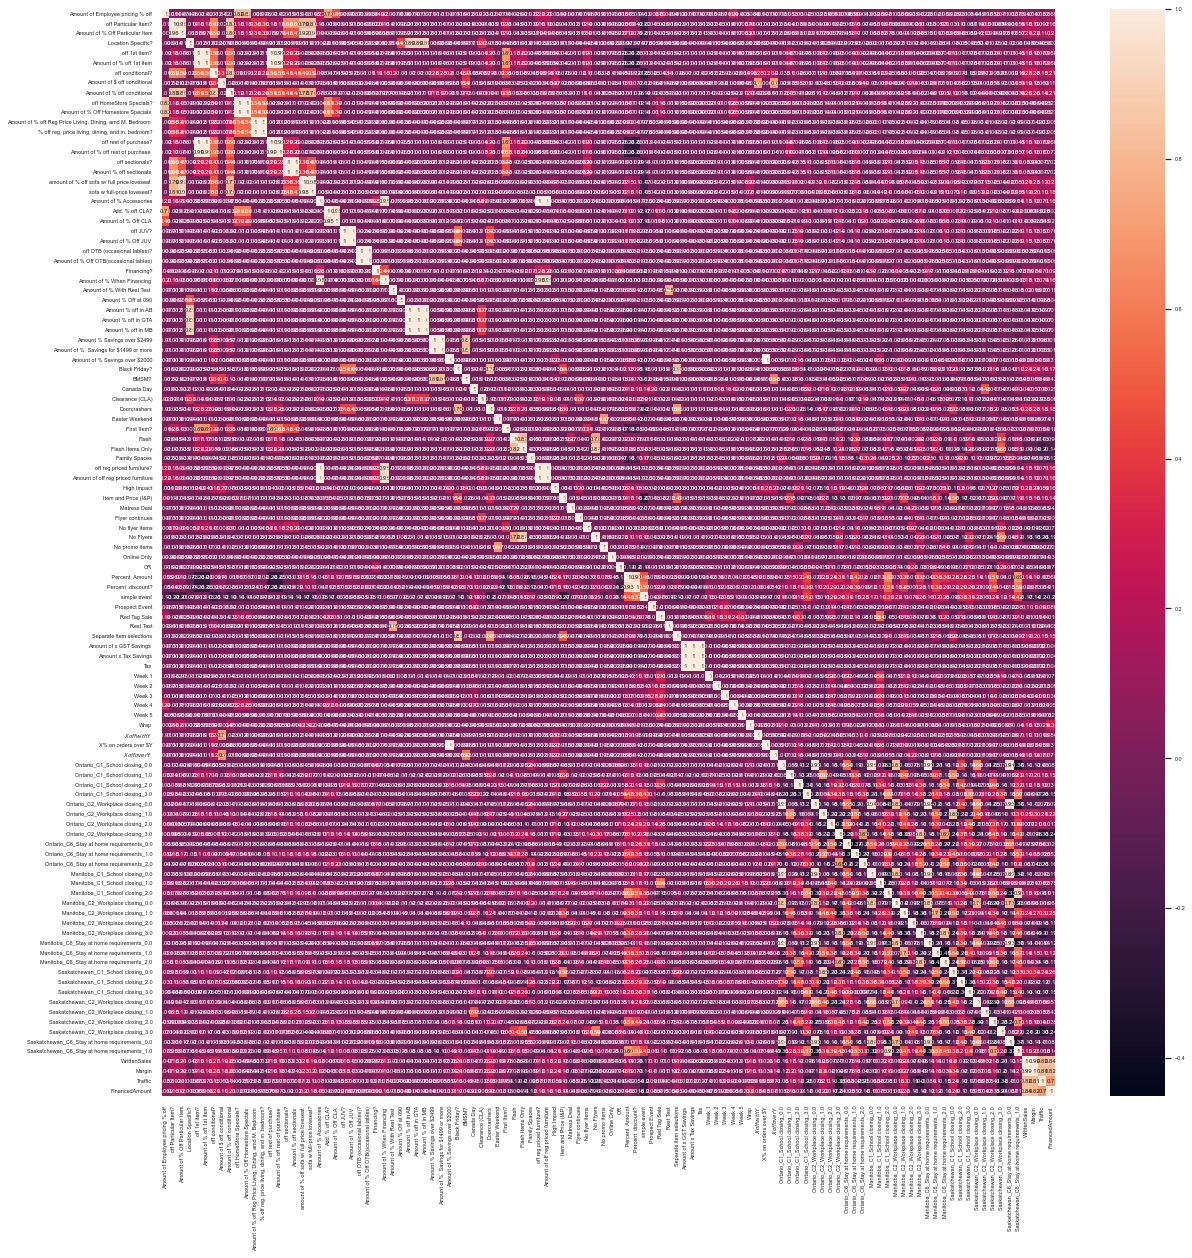

In [146]:
correlation_mat = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [147]:
correlation_mat.tail(10)

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,Ontario_C1_School closing_0.0,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_0.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_0.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_0.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_0.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_0.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_0.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_0.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_0.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
Saskatchewan_C2_Workplace closing_0.0,-0.048741,0.014123,0.042307,-0.030164,0.017212,0.017212,0.029188,0.039929,0.044258,-0.055951,-0.055951,-0.030164,-0.030164,0.017212,0.017548,-0.055951,-0.055951,0.066513,0.052721,-0.013463,-0.063809,-0.060300,-0.033059,-0.033059,-0.013463,-0.013463,0.093952,-0.007807,-0.026966,-0.013463,-0.026966,-0.026966,-0.026966,-0.038069,-0.038002,-0.026966,-0.060779,-0.046892,-0.039529,-0.072204,-0.077345,-0.026966,-0.008153,-0.049604,-0.081013,0.126882,-0.013463,-0.013463,-0.115763,-0.067146,-0.026966,-0.026966,-0.033059,-0.070867,-0.040549,-0.013463,0.035486,0.142873,0.212889,0.230738,-0.033059,-0.057602,-0.035726,-0.050699,-0.026966,-0.026966,-0.026966,-0.069507,-0.033059,-0.040549,-0.038211,-0.019049,0.071832,0.082831,-0.026966,-0.026966,0.647857,0.158799,-0.174951,-0.020617,0.657045,0.464606,-0.212730,-0.238394,0.274258,0.181039,-0.162074,0.661606,-0.015011,-0.077544,0.753011,0.093955,-0.102599,-0.243587,0.643228,0.151675,-0.246831,0.423246,0.146151,-0.218172,1.000000,-0.062311,-0.387973,-0.120201,0.659463,-0.097634,0.048551,0.066566,0.065885,0.057311
Saskatchewan_C2_Workplace closing_1.0,-0.016443,0.153755,0.130381,-0.010176,-0.025669,-0.025669,0.073152,-0.015602,0.097500,-0.018876,-0.018876,-0.010176,-0.010176,-0.025669,-0.025530,0.250776,0.250776,0.148306,0.200271,-0.004542,-0.021526,-0.020343,-0.011153,-0.011153,-0.004

In [148]:
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.2)

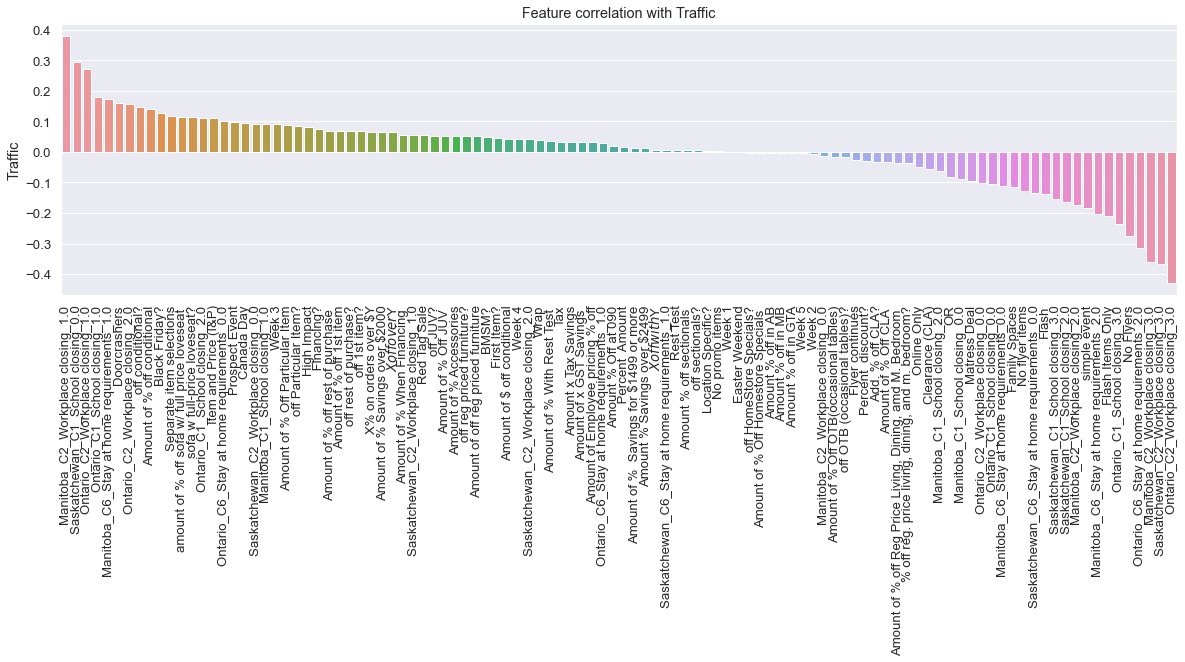

In [149]:
promo_corr = data.corr(method='spearman').iloc[-2,:-4]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Traffic', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation with Traffic')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Traffic');

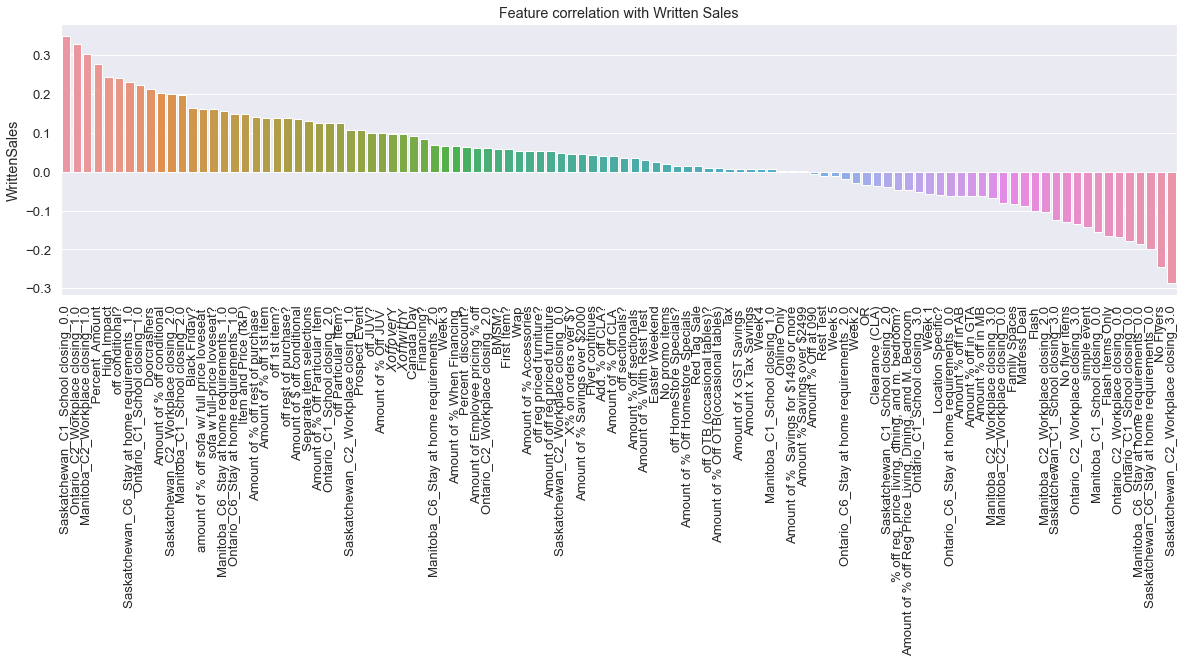

In [150]:
promo_corr = data.corr(method='spearman').iloc[-4,:-4]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'WrittenSales', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation with Written Sales')
sns.barplot (data = corr_df, x = corr_df.index, y = 'WrittenSales');

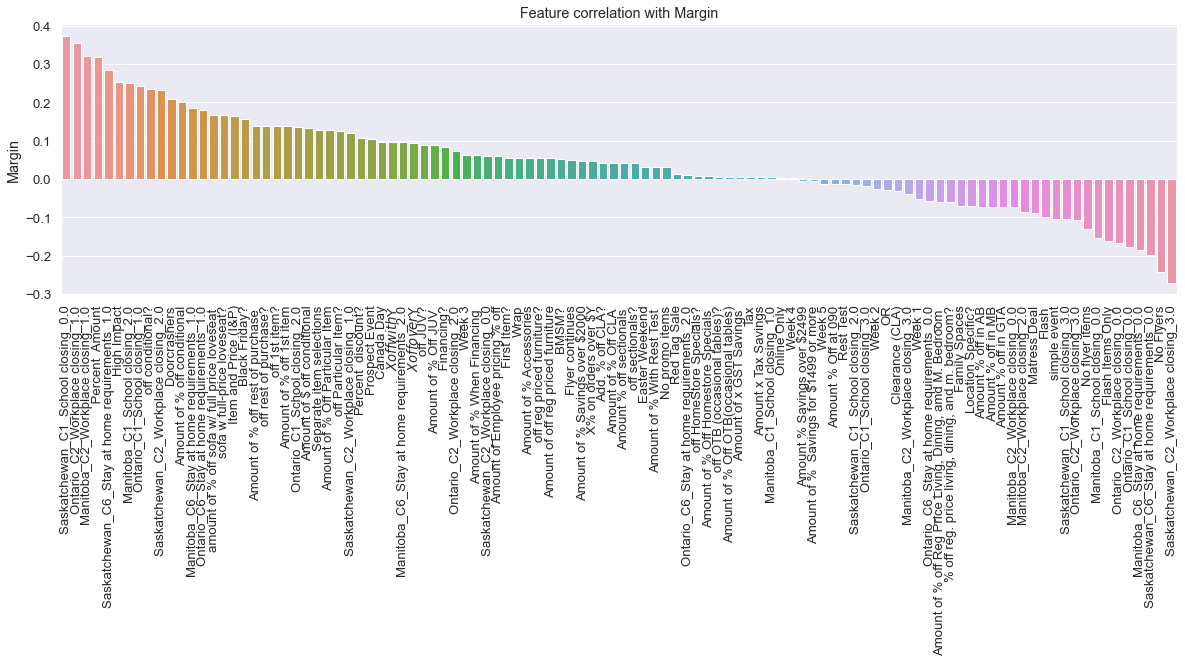

In [151]:
promo_corr = data.corr(method='spearman').iloc[-3,:-4]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Margin', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation with Margin')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Margin');

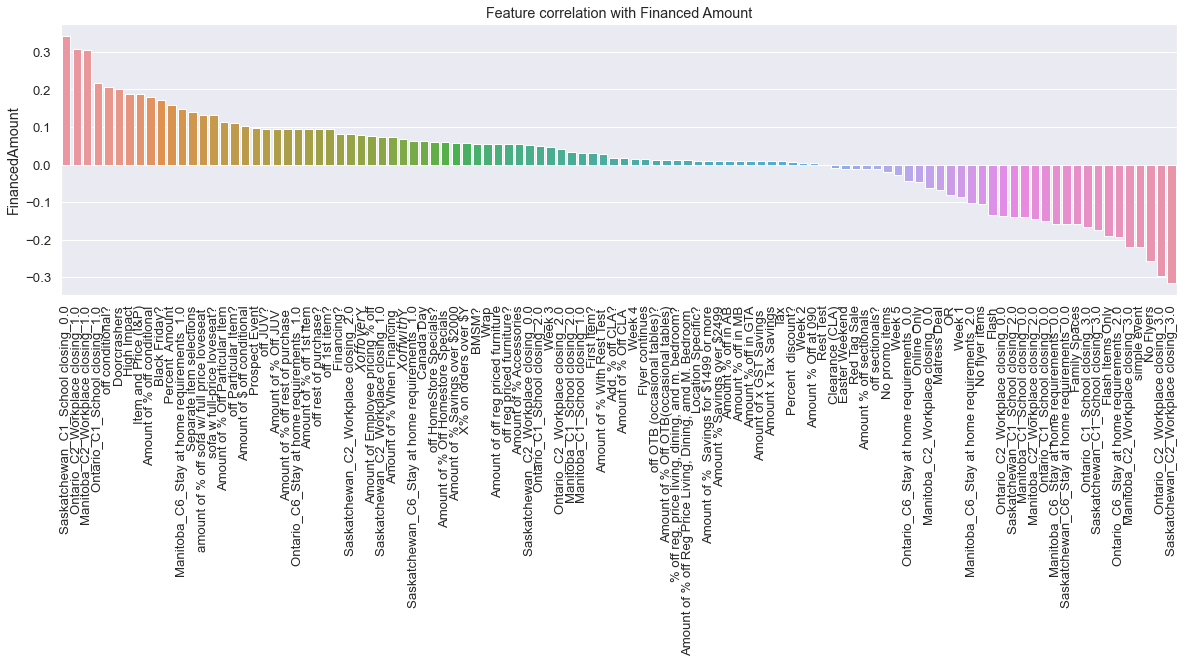

In [152]:
promo_corr = data.corr(method='spearman').iloc[-1,:-4]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'FinancedAmount', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation with Financed Amount')
sns.barplot (data = corr_df, x = corr_df.index, y = 'FinancedAmount');

### OLS (Ordinary least squares)

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score

In [155]:
import statsmodels.api as sm

X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["Traffic"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Traffic   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              24.44
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                   1.71e-171
Time:                        11:53:21   Log-Likelihood:                         -12579.
No. Observations:                1020   AIC:                                  2.531e+04
Df Residuals:                     946   BIC:                                  2.567e+04
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Amount of Employee pricing % off                           1122.1195    972.714      1.154      0.249    -786.806    3031.045
off Particular Item?                                       -301.6631   7962.180     -0.038      0.970   -1.59e+04    1.53e+04
Amount of % Off Particular Item                            -271.3728   1959.775     -0.138      0.890   -4117.381    3574.636
Location Specific?                                           54.4458     51.799      1.051      0.293     -47.207     156.099
off 1st item?                                              -350.3701    198.145     -1.768      0.077    -739.225      38.485
Amount of % off 1st item                                  -1.401e+04   7925.813     -1.768      0.077   -2.96e+04    1539.406
off conditional?                                           1.535e+04   1.47e+04      1.041      0.298   -1.36e+04    4.43e+04
Amount of $ off conditional                                  54.1174     52.294      1.035      0.301     -48.509     156.744
Amount of % off conditional                                5302.2669   4526.281      1.171      0.242   -3580.445    1.42e+04
off HomeStore Specials?                                     -47.3680     83.734     -0.566      0.572    -211.694     116.958
Amount of % Off Homestore Specials                        -1042.0964   1842.153     -0.566      0.572   -4657.276    2573.083
Amount of % off Reg Price Living, Dining, amd M. Bedroom  -4377.4500   4754.769     -0.921      0.357   -1.37e+04    4953.664
% off reg. price living, dining, and m. bedroom?            -87.5490     95.095     -0.921      0.357    -274.171      99.073
off rest of purchase?                                      -350.3701    198.145     -1.768      0.077    -739.225      38.485
Amount of % off rest of purchase                           1.567e+04   1.11e+04      1.418      0.157   -6022.510    3.74e+04
off sectionals?                                              -7.6151     30.973     -0.246      0.806     -68.400      53.169
Amount % off sectionals                                    -228.4541    929.200     -0.246      0.806   -2051.985    1595.077
amount of % off sofa w/ full price loveseat               -4319.1520   5182.092     -0.833      0.405   -1.45e+04    5850.573
sofa w full-price loveseat?                                -498.2219   7999.398     -0.062      0.950   -1.62e+04    1.52e+04
Amount of % Accessories                                    -490.0176   2896.924     -0.169      0.866   -6175.159    5195.123
Add. % off CLA?                                             107.3909     71.628      1

In [156]:
import statsmodels.api as sm

X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["WrittenSales"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           WrittenSales   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.654
Method:                 Least Squares   F-statistic:                              27.09
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                   3.94e-185
Time:                        11:54:21   Log-Likelihood:                         -14576.
No. Observations:                1020   AIC:                                  2.930e+04
Df Residuals:                     946   BIC:                                  2.967e+04
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Amount of Employee pricing % off                           4820.2869   6890.480      0.700      0.484   -8702.107    1.83e+04
off Particular Item?                                      -8.141e+04   5.64e+04     -1.443      0.149   -1.92e+05    2.93e+04
Amount of % Off Particular Item                            -714.3788   1.39e+04     -0.051      0.959    -2.8e+04    2.65e+04
Location Specific?                                          110.1807    366.929      0.300      0.764    -609.908     830.269
off 1st item?                                             -2864.7122   1403.616     -2.041      0.042   -5619.274    -110.151
Amount of % off 1st item                                  -1.146e+05   5.61e+04     -2.041      0.042   -2.25e+05   -4406.033
off conditional?                                          -1.685e+04   1.04e+05     -0.161      0.872   -2.22e+05    1.88e+05
Amount of $ off conditional                                1140.4086    370.441      3.079      0.002     413.427    1867.390
Amount of % off conditional                                3.155e+04   3.21e+04      0.984      0.325   -3.14e+04    9.45e+04
off HomeStore Specials?                                    -405.3003    593.154     -0.683      0.495   -1569.350     758.750
Amount of % Off Homestore Specials                        -8916.6076    1.3e+04     -0.683      0.495   -3.45e+04    1.67e+04
Amount of % off Reg Price Living, Dining, amd M. Bedroom  -2.203e+04   3.37e+04     -0.654      0.513   -8.81e+04    4.41e+04
% off reg. price living, dining, and m. bedroom?           -440.5144    673.634     -0.654      0.513   -1762.504     881.475
off rest of purchase?                                     -2864.7122   1403.616     -2.041      0.042   -5619.274    -110.151
Amount of % off rest of purchase                           1.595e+05   7.83e+04      2.037      0.042    5846.634    3.13e+05
off sectionals?                                            -217.3974    219.408     -0.991      0.322    -647.980     213.185
Amount % off sectionals                                   -6521.9231   6582.238     -0.991      0.322   -1.94e+04    6395.552
amount of % off sofa w/ full price loveseat               -2.022e+04   3.67e+04     -0.551      0.582   -9.23e+04    5.18e+04
sofa w full-price loveseat?                               -8.233e+04   5.67e+04     -1.453      0.147   -1.94e+05    2.89e+04
Amount of % Accessories                                    2311.1809   2.05e+04      0.113      0.910    -3.8e+04    4.26e+04
Add. % off CLA?                                             356.4618    507.398      0

###### train/test

http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [158]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["Traffic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) # make the predictions by the model

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2:", r2)

# Print out the statistics
model.summary()

RMSE: 50974.70240382982
R2: -0.42481789798488756


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Traffic   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.605
Method:                 Least Squares   F-statistic:                              18.35
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                   9.42e-122
Time:                        11:55:17   Log-Likelihood:                         -10083.
No. Observations:                 816   AIC:                                  2.031e+04
Df Residuals:                     744   BIC:                                  2.065e+04
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Amount of Employee pricing % off                            392.8852   1359.905      0.289      0.773   -2276.823    3062.593
off Particular Item?                                       -198.7151   7943.233     -0.025      0.980   -1.58e+04    1.54e+04
Amount of % Off Particular Item                             137.7637   2111.876      0.065      0.948   -4008.183    4283.710
Location Specific?                                           59.1905     55.060      1.075      0.283     -48.902     167.283
off 1st item?                                              -266.5388    247.742     -1.076      0.282    -752.896     219.818
Amount of % off 1st item                                  -1.066e+04   9909.685     -1.076      0.282   -3.01e+04    8792.720
off conditional?                                          -1027.9530   2.15e+04     -0.048      0.962   -4.33e+04    4.13e+04
Amount of $ off conditional                                 132.1908     73.018      1.810      0.071     -11.154     275.536
Amount of % off conditional                                1741.8804   6970.998      0.250      0.803   -1.19e+04    1.54e+04
off HomeStore Specials?                                      26.2217    119.606      0.219      0.827    -208.584     261.027
Amount of % Off Homestore Specials                          576.8775   2631.335      0.219      0.827   -4588.848    5742.603
Amount of % off Reg Price Living, Dining, amd M. Bedroom  -1434.1299   6906.163     -0.208      0.836    -1.5e+04    1.21e+04
% off reg. price living, dining, and m. bedroom?            -28.6826    138.123     -0.208      0.836    -299.840     242.475
off rest of purchase?                                      -266.5388    247.742     -1.076      0.282    -752.896     219.818
Amount of % off rest of purchase                           1.603e+04   1.15e+04      1.396      0.163   -6505.800    3.86e+04
off sectionals?                                              -0.8091     34.314     -0.024      0.981     -68.173      66.555
Amount % off sectionals                                     -24.2733   1029.424     -0.024      0.981   -2045.196    1996.649
amount of % off sofa w/ full price loveseat                -836.9102   7706.607     -0.109      0.914    -1.6e+04    1.43e+04
sofa w full-price loveseat?                                -260.2203   7996.222     -0.033      0.974    -1.6e+04    1.54e+04
Amount of % Accessories                                   -1484.1489   3040.591     -0.488      0.626   -7453.309    4485.011
Add. % off CLA?                                             136.6348     79.121      1

In [40]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["WrittenSales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) # make the predictions by the model

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2:", r2)

# Print out the statistics
model.summary()

RMSE: 6495286.651454194
R2: 0.14272021788743527


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           WrittenSales   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                              15.55
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                   3.94e-106
Time:                        12:00:12   Log-Likelihood:                         -14113.
No. Observations:                 816   AIC:                                  2.837e+04
Df Residuals:                     744   BIC:                                  2.871e+04
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Amount of Employee pricing % off                          -4.068e+04    1.9e+05     -0.214      0.830   -4.13e+05    3.32e+05
off Particular Item?                                      -6.035e+05   1.07e+06     -0.565      0.572    -2.7e+06    1.49e+06
Amount of % Off Particular Item                           -7.863e+04   2.95e+05     -0.267      0.790   -6.57e+05       5e+05
Location Specific?                                         3136.5196   7682.192      0.408      0.683   -1.19e+04    1.82e+04
off 1st item?                                             -4.018e+04   3.46e+04     -1.163      0.245   -1.08e+05    2.77e+04
Amount of % off 1st item                                  -1.607e+06   1.38e+06     -1.163      0.245   -4.32e+06    1.11e+06
off conditional?                                          -3.478e+05      3e+06     -0.116      0.908   -6.23e+06    5.53e+06
Amount of $ off conditional                                  2.3e+04   1.02e+04      2.261      0.024    3029.218     4.3e+04
Amount of % off conditional                                 2.52e+05   9.72e+05      0.259      0.796   -1.66e+06    2.16e+06
off HomeStore Specials?                                    2333.2969   1.67e+04      0.140      0.889   -3.04e+04    3.51e+04
Amount of % Off Homestore Specials                         5.133e+04   3.67e+05      0.140      0.889   -6.69e+05    7.72e+05
Amount of % off Reg Price Living, Dining, amd M. Bedroom  -1.062e+05   9.63e+05     -0.110      0.912      -2e+06    1.79e+06
% off reg. price living, dining, and m. bedroom?          -2123.3502   1.93e+04     -0.110      0.912   -3.99e+04    3.57e+04
off rest of purchase?                                     -4.018e+04   3.46e+04     -1.163      0.245   -1.08e+05    2.77e+04
Amount of % off rest of purchase                           2.467e+06    1.6e+06      1.540      0.124   -6.77e+05    5.61e+06
off sectionals?                                           -2784.4575   4776.764     -0.583      0.560   -1.22e+04    6593.083
Amount % off sectionals                                   -8.353e+04   1.43e+05     -0.583      0.560   -3.65e+05    1.98e+05
amount of % off sofa w/ full price loveseat                2221.0976   1.08e+06      0.002      0.998   -2.11e+06    2.11e+06
sofa w full-price loveseat?                               -6.034e+05   1.08e+06     -0.561      0.575   -2.71e+06    1.51e+06
Amount of % Accessories                                   -1.723e+05   4.24e+05     -0.407      0.684      -1e+06     6.6e+05
Add. % off CLA?                                            1.038e+04    1.1e+04      0

### Linear Regression

In [159]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["Traffic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 35774.7420288645
R2: 0.2982167708958333


In [160]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["WrittenSales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 315518.3656121795
R2: 0.33753765745412845


#### cross validation 

In [161]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["Traffic"]

lm = LinearRegression()
model = lm.fit(X_train, y_train)
crossvalidation = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
R2_scores = cross_val_score(model, X, y, scoring='r2', cv=crossvalidation)

# print("MSE:", str(np.mean(np.abs(scores))))
print("RMSE:",str(np.sqrt(np.mean(np.abs(scores)))))
print("R2:", str(np.mean(np.abs(R2_scores))))
# print("STD:", str(np.std(scores)))

RMSE: 2003670674599.2644
R2: 3250372829131324.0


In [108]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["WrittenSales"]

lm = LinearRegression()
model = lm.fit(X_train, y_train)
crossvalidation = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
R2_scores = cross_val_score(model, X, y, scoring='r2', cv=crossvalidation)

# print("MSE:", str(np.mean(np.abs(scores))))
print("RMSE:",str(np.sqrt(np.mean(np.abs(scores)))))
print("R2:", str(np.mean(np.abs(R2_scores))))
# print("STD:", str(np.std(scores)))

RMSE: 1073349460665676.0
R2: 1.6344962989946058e+16


### Polynomial Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["Traffic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print("MSE for quadratic",mean_squared_error(y_test, model.predict(X_test2)))
print("R-square for quadratic:", r2_score(y_test,model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print("RMSE for cubic:", mean_squared_error(y_test, model.predict(X_test3)))
print("R-square for cubic:", r2_score(y_test,model.predict(X_test3)))

MSE for quadratic 3.9128537335532946e+26
R-square for quadratic: -5407487646759151.0
RMSE for cubic: 813440162578965.0
R-square for cubic: -11240.584608196032


In [88]:
for i in range(1,4):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+"polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 7.137934661341945e+29, STD: 2.052464261991268e+30
Degree-2 polynomial MSE: 1.1834515460428786e+25, STD: 2.3176125635140407e+25


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\DKici\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-88-ccb274eb8438>", line 5, in <module>
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
  File "C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 440, in cross_val_score
    cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
  File "C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 246, in cross_validate
    results = parallel(
  File "C:\Users\DKici\Anaconda

TypeError: object of type 'NoneType' has no len()

##### cross validation all data

In [ ]:
X = data.drop(["Traffic", "WrittenSales", "Margin", "FinancedAmount"],axis=1)
y = data["Traffic"]

crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)

for i in range(1,4):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

### SVM

In [ ]:
# X = data.drop(["Event_detailed","Event","Start Date","End Date","Written_GM_%","Written_$", "Written_GM_$", "Traffic", "SPG_caclculated_$"],axis=1).values
X = data.values 
y = data.values #Traffic

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
sc_X

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Traffic vs duration (SVR)')
plt.xlabel('duration')
plt.ylabel('Traffic')
plt.show()

#### Decision Tree Regression

In [ ]:
X = data.iloc[:,15:16].values #duration
y = data.iloc[:,7:8].values #Traffic

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

In [ ]:
regressor.predict([[3]])

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Traffic vs duration (Decision Tree Regression)')
plt.xlabel('Traffic')
plt.ylabel('duration')
plt.show()

In [ ]:
type(data["Traffic"][0])

### Random Forest Regression

In [ ]:
X = data.iloc[:,15:16].values #duration
y = data.iloc[:,7:8].values #Traffic

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

In [ ]:
regressor.predict([[1]])

In [ ]:
data[["Traffic", "duration"]]

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Traffic vs duration(Random Forest Regression)')
plt.xlabel('duration')
plt.ylabel('Traffic')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = data.drop(["Event_detailed","Event","Start Date","End Date","Written_GM_%","Written_$", "Written_GM_$", "Traffic", "SPG_caclculated_$"],axis=1).values
y = data.iloc[:,7:8] #Traffic


regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_samples_leaf=1, 
                      min_samples_split=2, min_weight_fraction_leaf=0.0, 
                      random_state=None,splitter='best')

In [116]:
data.Traffic.max()

7741921.0

In [100]:
from sklearn import linear_model